In [1]:
import pandas as pd
import os

In [2]:
scoring = pd.read_pickle(os.path.join('data', 'scoring_mi.pickle'))
birth_dates = pd.read_pickle(os.path.join('data', 'birth_dates.pickle'))
scoring.head()

,,tmID,GP,G,A,Pts,SOG
playerID,year,,,,,,
abrahth01,1980,HAR,32.0,6.0,11.0,17.0,66.0
actonke01,1980,MTL,61.0,15.0,24.0,39.0,101.0
adamsgr01,1980,PHI,6.0,3.0,0.0,3.0,6.0
alleyst01,1980,HAR,8.0,2.0,2.0,4.0,10.0
allismi01,1980,NYR,75.0,26.0,38.0,64.0,122.0


In [3]:
wayne = scoring.loc['gretzwa01']
wayne

,tmID,GP,G,A,Pts,SOG
year,,,,,,
1980,EDM,80.0,55.0,109.0,164.0,261.0
1981,EDM,80.0,92.0,120.0,212.0,369.0
1982,EDM,80.0,71.0,125.0,196.0,348.0
1983,EDM,74.0,87.0,118.0,205.0,324.0
1984,EDM,80.0,73.0,135.0,208.0,358.0
1985,EDM,80.0,52.0,163.0,215.0,350.0
1986,EDM,79.0,62.0,121.0,183.0,288.0
1987,EDM,64.0,40.0,109.0,149.0,211.0
1988,LAK,78.0,54.0,114.0,168.0,303.0


In [4]:
sums = wayne.groupby(level=0)["G", "A"].sum()
sums

D:\anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0
1985,52.0,163.0
1986,62.0,121.0
1987,40.0,109.0
1988,54.0,114.0


In [5]:
means = sums.rolling(3)["G"].mean()
means.head(10)

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

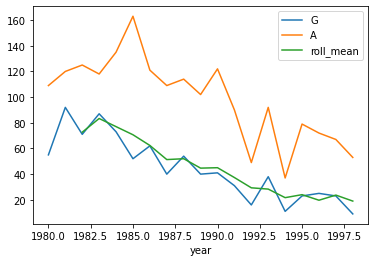

In [6]:
%matplotlib inline
sums.assign(roll_mean=means).plot();

In [7]:
means = sums.rolling(3, min_periods=2)["G"].mean()
means.head(10)

year
1980          NaN
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

In [8]:
means = sums.rolling(3, min_periods=1)["G"].mean()
means.head(10)

year
1980    55.000000
1981    73.500000
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
Name: G, dtype: float64

In [9]:
means = sums.rolling(3).mean()
means.head()

,G,A
year,,
1980,NaN,NaN
1981,NaN,NaN
1982,72.666667,118.0
1983,83.333333,121.0
1984,77.000000,126.0


In [10]:
means = sums.rolling(3, center=True).mean()
means

,G,A
year,,
1980,NaN,NaN
1981,72.666667,118.000000
1982,83.333333,121.000000
1983,77.000000,126.000000
1984,70.666667,138.666667
1985,62.333333,139.666667
1986,51.333333,131.000000
1987,52.000000,114.666667
1988,44.666667,108.333333


In [11]:
means = sums.rolling(4, center=True).mean()
means.head()

,G,A
year,,
1980,NaN,NaN
1981,NaN,NaN
1982,76.25,118.00
1983,80.75,124.50
1984,70.75,135.25


In [12]:
means = sums.rolling(3, center=True).sum()
means.head()

,G,A
year,,
1980,NaN,NaN
1981,218.0,354.0
1982,250.0,363.0
1983,231.0,378.0
1984,212.0,416.0


In [13]:
triang_goals_sum = sums['G'].rolling(3,
                                     win_type='triang',
                                       center=True).sum()
sums.assign(triang = triang_goals_sum).head()

,G,A,triang
year,,,
1980,55.0,109.0,NaN
1981,92.0,120.0,155.0
1982,71.0,125.0,160.5
1983,87.0,118.0,159.0
1984,73.0,135.0,142.5


In [14]:
quarter_counts = birth_dates.resample('Q').count()
quarter_counts.rolling(4).sum().head(10)

birthDate
1940Q1    NaN
1940Q2    NaN
1940Q3    NaN
1940Q4    3.0
1941Q1    1.0
1941Q2    1.0
1941Q3    1.0
1941Q4    0.0
1942Q1    1.0
1942Q2    1.0
Freq: Q-DEC, Name: playerID, dtype: float64

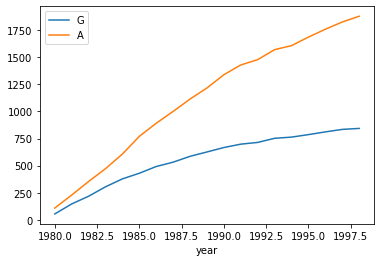

In [15]:
sums.expanding().sum().plot();

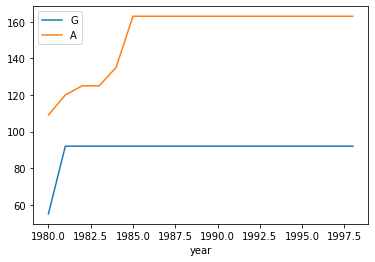

In [16]:
sums.expanding().max().plot();

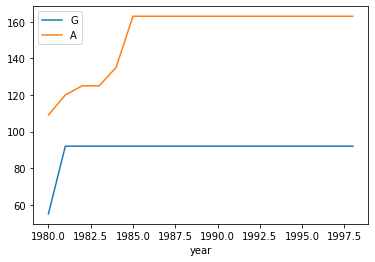

In [17]:
sums.cummax().plot();

In [18]:
totals = sums.sum()
totals

G     843.0
A    1877.0
dtype: float64

In [19]:
sums.head()

,G,A
year,,
1980,55.0,109.0
1981,92.0,120.0
1982,71.0,125.0
1983,87.0,118.0
1984,73.0,135.0


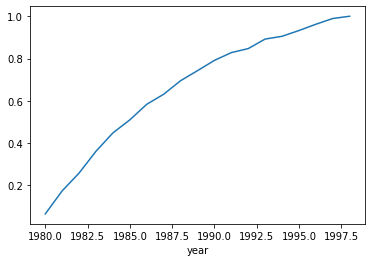

In [20]:
total_part = sums['G'].expanding().aggregate(lambda x: x.sum() / totals['G'])
total_part.plot();